In [1]:
from langchain_core.messages import HumanMessage

from agents.gmail.email import EmailAgent
from google_client.user_client import UserClient

from dotenv import load_dotenv
load_dotenv()

token_path = r"C:\Users\dagms\Projects\Credentials\token-1.json"
creds_path = r"C:\Users\dagms\Projects\Credentials\credentials.json"

user = UserClient.from_file(token_path, creds_path)
gmail_service = user.gmail

agent = EmailAgent(gmail_service, debug=True)

In [5]:
from shared.constants import MODELS
from langchain_anthropic import ChatAnthropic

llm = ChatAnthropic(model_name=MODELS['anthropic']['opus'])
agent.llm = llm

In [2]:
response = agent.execute("Find all emails from yolyanayohannes and classify them as assignment, shopping or other depending on the content of the email")

-----

Tool calls - EmailAgent:
{'name': 'search_emails', 'args': {'from_sender': 'yolyanayohannes', 'get_body_text': True}, 'id': 'ef42e2fc-bfcf-4453-b2ef-7529028e6b28', 'type': 'tool_call'}
-----

Tool output - search_emails: [{'message_id': '19673c455b8e769e', 'thread_id': '19673c455b8e769e', 'subject': '', 'from': EmailAddress(email='yolyanayohannes@gmail.com', name='Yolyana Yohannes'), 'to': [EmailAddress(email='dagmawishewadeg@gmail.com', name='Dagmawi Molla')], 'date_time': '2025-04-26T16:22:35-04:00', 'snippet': '', 'is_read': True, 'is_starred': False, 'is_important': True, 'labels': ['IMPORTANT', 'CATEGORY_PERSONAL', 'INBOX'], 'has_attachments': True, 'body_text': '\r\n\n\n'}, {'message_id': '196466aa6f5f3e9f', 'thread_id': '196466aa6f5f3e9f', 'subject': '', 'from': EmailAddress(email='yolyanayohannes@gmail.com', name='Yolyana Yohannes'), 'to': [EmailAddress(email='dagmawishewadeg@gmail.com', name='Dagmawi Molla')], 'date_time': '2025-04-17T21:01:44-04:00', 'snippet': '', 'is

In [5]:
agent.execute("yes")

-----

Tool calls - EmailAgent:
{'name': 'search_emails', 'args': {'from_sender': 'yolyanayohannes'}, 'id': '7c9e5745-8de8-444d-8fdc-f833d9e98774', 'type': 'tool_call'}
-----

Tool output - search_emails: [{'message_id': '19673c455b8e769e', 'thread_id': '19673c455b8e769e', 'subject': '', 'from': EmailAddress(email='yolyanayohannes@gmail.com', name='Yolyana Yohannes'), 'to': [EmailAddress(email='dagmawishewadeg@gmail.com', name='Dagmawi Molla')], 'date_time': '2025-04-26T16:22:35-04:00', 'snippet': '', 'is_read': True, 'is_starred': False, 'is_important': True, 'labels': ['IMPORTANT', 'CATEGORY_PERSONAL', 'INBOX'], 'has_attachments': True, 'body_text': None}, {'message_id': '196466aa6f5f3e9f', 'thread_id': '196466aa6f5f3e9f', 'subject': '', 'from': EmailAddress(email='yolyanayohannes@gmail.com', name='Yolyana Yohannes'), 'to': [EmailAddress(email='dagmawishewadeg@gmail.com', name='Dagmawi Molla')], 'date_time': '2025-04-17T21:01:44-04:00', 'snippet': '', 'is_read': True, 'is_starred': F

{'success': True,
 'tool_outputs': [{'tool_name': 'search_emails',
   'content': "[{'message_id': '19673c455b8e769e', 'thread_id': '19673c455b8e769e', 'subject': '', 'from': EmailAddress(email='yolyanayohannes@gmail.com', name='Yolyana Yohannes'), 'to': [EmailAddress(email='dagmawishewadeg@gmail.com', name='Dagmawi Molla')], 'date_time': '2025-04-26T16:22:35-04:00', 'snippet': '', 'is_read': True, 'is_starred': False, 'is_important': True, 'labels': ['IMPORTANT', 'CATEGORY_PERSONAL', 'INBOX'], 'has_attachments': True, 'body_text': None}, {'message_id': '196466aa6f5f3e9f', 'thread_id': '196466aa6f5f3e9f', 'subject': '', 'from': EmailAddress(email='yolyanayohannes@gmail.com', name='Yolyana Yohannes'), 'to': [EmailAddress(email='dagmawishewadeg@gmail.com', name='Dagmawi Molla')], 'date_time': '2025-04-17T21:01:44-04:00', 'snippet': '', 'is_read': True, 'is_starred': False, 'is_important': True, 'labels': ['IMPORTANT', 'CATEGORY_PERSONAL', 'INBOX'], 'has_attachments': True, 'body_text': No

In [7]:
agent.execute("you can now send it to him and tell him that i forgot to include it in the original email")

-----

Tool calls - EmailAgent:
{'name': 'send_email', 'args': {'attachment_paths': ['C:\\Users\\dagms\\Downloads\\GmailAttachments\\project4db.sql'], 'to': ['dagmawishewadeg@gmail.com'], 'subject': 'Correction: Missing Attachment', 'body_text': "Hi Dagmawi,\n\nI apologize, I forgot to include the 'project4db.sql' attachment in the previous email. Please find it attached here.\n\nBest regards,"}, 'id': '3dfd77ee-480f-4b04-99ba-49f9f67b4536', 'type': 'tool_call'}
-----

Tool output - send_email: {"status": "success", "message_id": "1995fc4ceee692e0", "thread_id": "1995fc4ceee692e0", "message": "Email sent successfully"}
-----

Agent Output - EmailAgent: I have sent the "project4db.sql" attachment to dagmawishewadeg@gmail.com with the subject "Correction: Missing Attachment" and the body text:

"Hi Dagmawi,

I apologize, I forgot to include the 'project4db.sql' attachment in the previous email. Please find it attached here.

Best regards,"

The message ID for this email is 1995fc4ceee692

{'success': True,
 'tool_outputs': [{'tool_name': 'send_email',
   'content': '{"status": "success", "message_id": "1995fc4ceee692e0", "thread_id": "1995fc4ceee692e0", "message": "Email sent successfully"}'}],
 'final_response': 'I have sent the "project4db.sql" attachment to dagmawishewadeg@gmail.com with the subject "Correction: Missing Attachment" and the body text:\n\n"Hi Dagmawi,\n\nI apologize, I forgot to include the \'project4db.sql\' attachment in the previous email. Please find it attached here.\n\nBest regards,"\n\nThe message ID for this email is 1995fc4ceee692e0.'}

In [6]:
response = agent.execute("Find all Job alerts from linkedin and give me a bullet point of the job titles, companies and links")

-----

Tool calls - EmailAgent:
{'name': 'search_emails', 'args': {'search': 'Job alert', 'get_body_text': True, 'from_sender': 'linkedin.com', 'limit': 5}, 'id': '404857ea-bf4b-4213-9808-43425d35e68d', 'type': 'tool_call'}
-----

Tool output - search_emails: [{'message_id': '1995da5f69e645c6', 'subject': 'Dagmawi, new jobs posted in United States', 'from': EmailAddress(email='jobalerts-noreply@linkedin.com', name='LinkedIn Job Alerts'), 'to': [EmailAddress(email='dagmawishewadeg@gmail.com', name='Dagmawi Molla')], 'date_time': '2025-09-18T12:26:19-04:00', 'snippet': 'View jobs in United States ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏', 'is_read': False, 'is_starred': False, 'is_important': False, 'labels': ['UNREAD', 'CATEGORY_UPDATES', 'INBOX'], 'has_attachments': False, 'body_text': 'Your job alert for United States\r\nNew jobs match your preferences.\

In [2]:
response = agent.execute("what was the last email i got from yolyanayohannes")

-----

Tool calls - EmailAgent:
{'name': 'search_emails', 'args': {'from_sender': 'yolyanayohannes', 'limit': 1}, 'id': 'f5e757fc-08e3-4249-ad46-a9243746d1f9', 'type': 'tool_call'}
-----

Tool output - search_emails: [{'message_id': '19929c8d2acb083c', 'subject': "Fwd: We're getting your order ready! 🛍️", 'from': EmailAddress(email='yolyanayohannes@gmail.com', name='Yolyana Yohannes'), 'to': [EmailAddress(email='dagmawishewadeg@gmail.com', name='Dagmawi Molla')], 'date_time': '2025-09-08T10:43:58-04:00', 'snippet': "---------- Forwarded message --------- From: Ulta Beauty Orders <guestservices@e.ulta.com> Date: Sun, Sep 7, 2025 at 5:47 PM Subject: We're getting your order ready! 🛍️ To: <", 'is_read': True, 'is_starred': False, 'is_important': True, 'labels': ['IMPORTANT', 'CATEGORY_PERSONAL', 'INBOX'], 'has_attachments': False, 'body_text': None}]
-----

Agent Output - EmailAgent: The last email you got from Yolyana Yohannes is with the subject "Fwd: We're getting your order ready! 🛍️"

In [3]:
response = agent.execute("delete it")

-----

Agent Output - EmailAgent: Are you sure you want to delete the email with the subject "Fwd: We're getting your order ready! 🛍️" from Yolyana Yohannes?
-----



In [4]:
response = agent.execute("yes")

-----

Tool calls - EmailAgent:
{'name': 'delete_email', 'args': {'message_id': '19929c8d2acb083c'}, 'id': '4def4f71-b7d6-45ac-894f-3ca39b279ae6', 'type': 'tool_call'}
-----

Tool output - delete_email: {"status": "success", "message_id": "19929c8d2acb083c", "message": "Email 19929c8d2acb083c deleted successfully"}
-----

Agent Output - EmailAgent: The email with the subject "Fwd: We're getting your order ready! 🛍️" from Yolyana Yohannes has been deleted.
-----



In [25]:
response = agent.execute("can you send this information to dagmawishewadeg@gmail.com and ask him if he can renew it for me")

-----

Agent Output - EmailAgent: What information would you like to send to dagmawishewadeg@gmail.com? Please provide the details you want to include in the email body.
-----



In [34]:
from langgraph.prebuilt import create_react_agent
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

def check_weather(location: str) -> str:
    '''Return the weather forecast for the specified location.'''
    return f"It's always sunny in {location}"

graph = create_react_agent(
    llm,
    tools=[check_weather],
    prompt="You are a helpful assistant",
    name="WeatherAgent",
)
inputs = {"messages": [{"role": "user", "content": "what is the weather in sf"}]}
# graph.stream_mode = "updates"

for chunk in graph.stream(inputs, stream_mode="values"):
    a = chunk['messages'][-1]
    print(a)
    print(type(a))
    print("tool_calls", hasattr(a, 'tool_calls'))
    if hasattr(a, 'tool_calls'):
        print("tool_calls", a.tool_calls)
    print('----')


# for i in graph.invoke(inputs)['messages']:
#     print(i)
#     print('----')
#     print()

content='what is the weather in sf' additional_kwargs={} response_metadata={} id='c8d4c619-fd6a-4d49-939d-0a5a6aa588ea'
<class 'langchain_core.messages.human.HumanMessage'>
tool_calls False
----
content='' additional_kwargs={'function_call': {'name': 'check_weather', 'arguments': '{"location": "San Francisco"}'}} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []} name='WeatherAgent' id='run--8bcb0515-fa86-4c4e-8cbf-92b1aa1ee4e1-0' tool_calls=[{'name': 'check_weather', 'args': {'location': 'San Francisco'}, 'id': '5697d0b5-f149-46ea-ba08-6cc0ab59af3f', 'type': 'tool_call'}] usage_metadata={'input_tokens': 53, 'output_tokens': 74, 'total_tokens': 127, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 58}}
<class 'langchain_core.messages.ai.AIMessage'>
tool_calls True
tool_calls [{'name': 'check_weather', 'args': {'location': 'San Francisco'}, 'id': 

In [1]:
from agents.gmail.agent import GmailAgent
from google_client.user_client import UserClient

from dotenv import load_dotenv
load_dotenv()

token_path = r"C:\Users\dagms\Projects\Credentials\token-1.json"
creds_path = r"C:\Users\dagms\Projects\Credentials\credentials.json"

user = UserClient.from_file(token_path, creds_path)
gmail_service = user.gmail

agent = GmailAgent(gmail_service, debug=True)

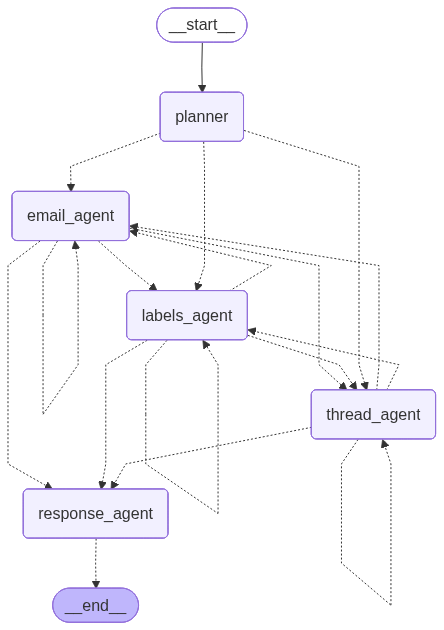

In [4]:
agent.research_graph

In [3]:
from langchain_core.messages import HumanMessage
response = agent.execute("can you label the last 5 emails i got from yolyanayohannes as either assignment, shopping or other")

[chain/start] [chain:LangGraph] Entering Chain run with input:
[inputs]
[chain/start] [chain:LangGraph > chain:planner] Entering Chain run with input:
[inputs]
[chain/start] [chain:LangGraph > chain:planner > chain:RunnableSequence] Entering Chain run with input:
[inputs]
[llm/start] [chain:LangGraph > chain:planner > chain:RunnableSequence > llm:ChatAnthropic] Entering LLM run with input:
{
  "prompts": [
    "System: \nYou are a helpful gmail supervisor assistant tasked with managing a conversation between\nthe following workers: email_agent, labels_agent, thread_agent\n\nBelow is the capabilities of each worker:\n1. email_agent:\n    - send email\n    - create draft\n    - reply\n    - forward\n    - delete email\n    - search\n    - download attachments\n\n2. labels_agent:\n    - list labels\n    - create label\n    - add label to email\n    - remove label from email\n    - rename label\n    - delete label\n\n3. thread_agent:\n    - search\n    - get thread details\n    - summarize

In [15]:
from agents.gmail.agent import State

a = State(**{'messages': [HumanMessage('hello')]})

In [6]:
from agents.gmail.agent import State
r = State.model_validate(response)

In [4]:
response['final_response']

'I\'ve labeled the last 5 emails from Yolyana Yohannes for you. Four emails have been labeled as "assignment", and the Sephora receipt email has been labeled as "shopping". There were no emails classified as "other" in this batch.'

In [2]:
from agents.gmail.labels.tools import ListUserLabelsTool, AddLabelTool

# tool = ListUserLabelsTool(gmail_service=gmail_service, rate_limiter=len)
# tool._run()
gmail_service.add_label('196113e1686b5766', ['Label_5'])

True